In [37]:
import zipfile
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import glob

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

#unzip images.zip file into images/
with zipfile.ZipFile("readonly/small_img2.zip","r") as zip_ref:
    zip_ref.extractall("images/")
   
def show_rects(faces):
    #Lets read in our gif and convert it
    pil_img=Image.open('images/a-3.png').convert("RGB")
    # Set our drawing context
    drawing=ImageDraw.Draw(pil_img)
    # And plot all of the rectangles in faces
    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="white")
        display(pil_img.crop((x,y,x+w,y+h)))
    #Finally lets display this
    display(pil_img)

In [20]:
#ask user input search string
search = input("Search for this string: ")

Search for this string: Chris


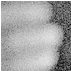

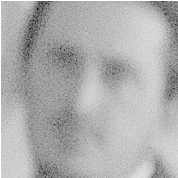

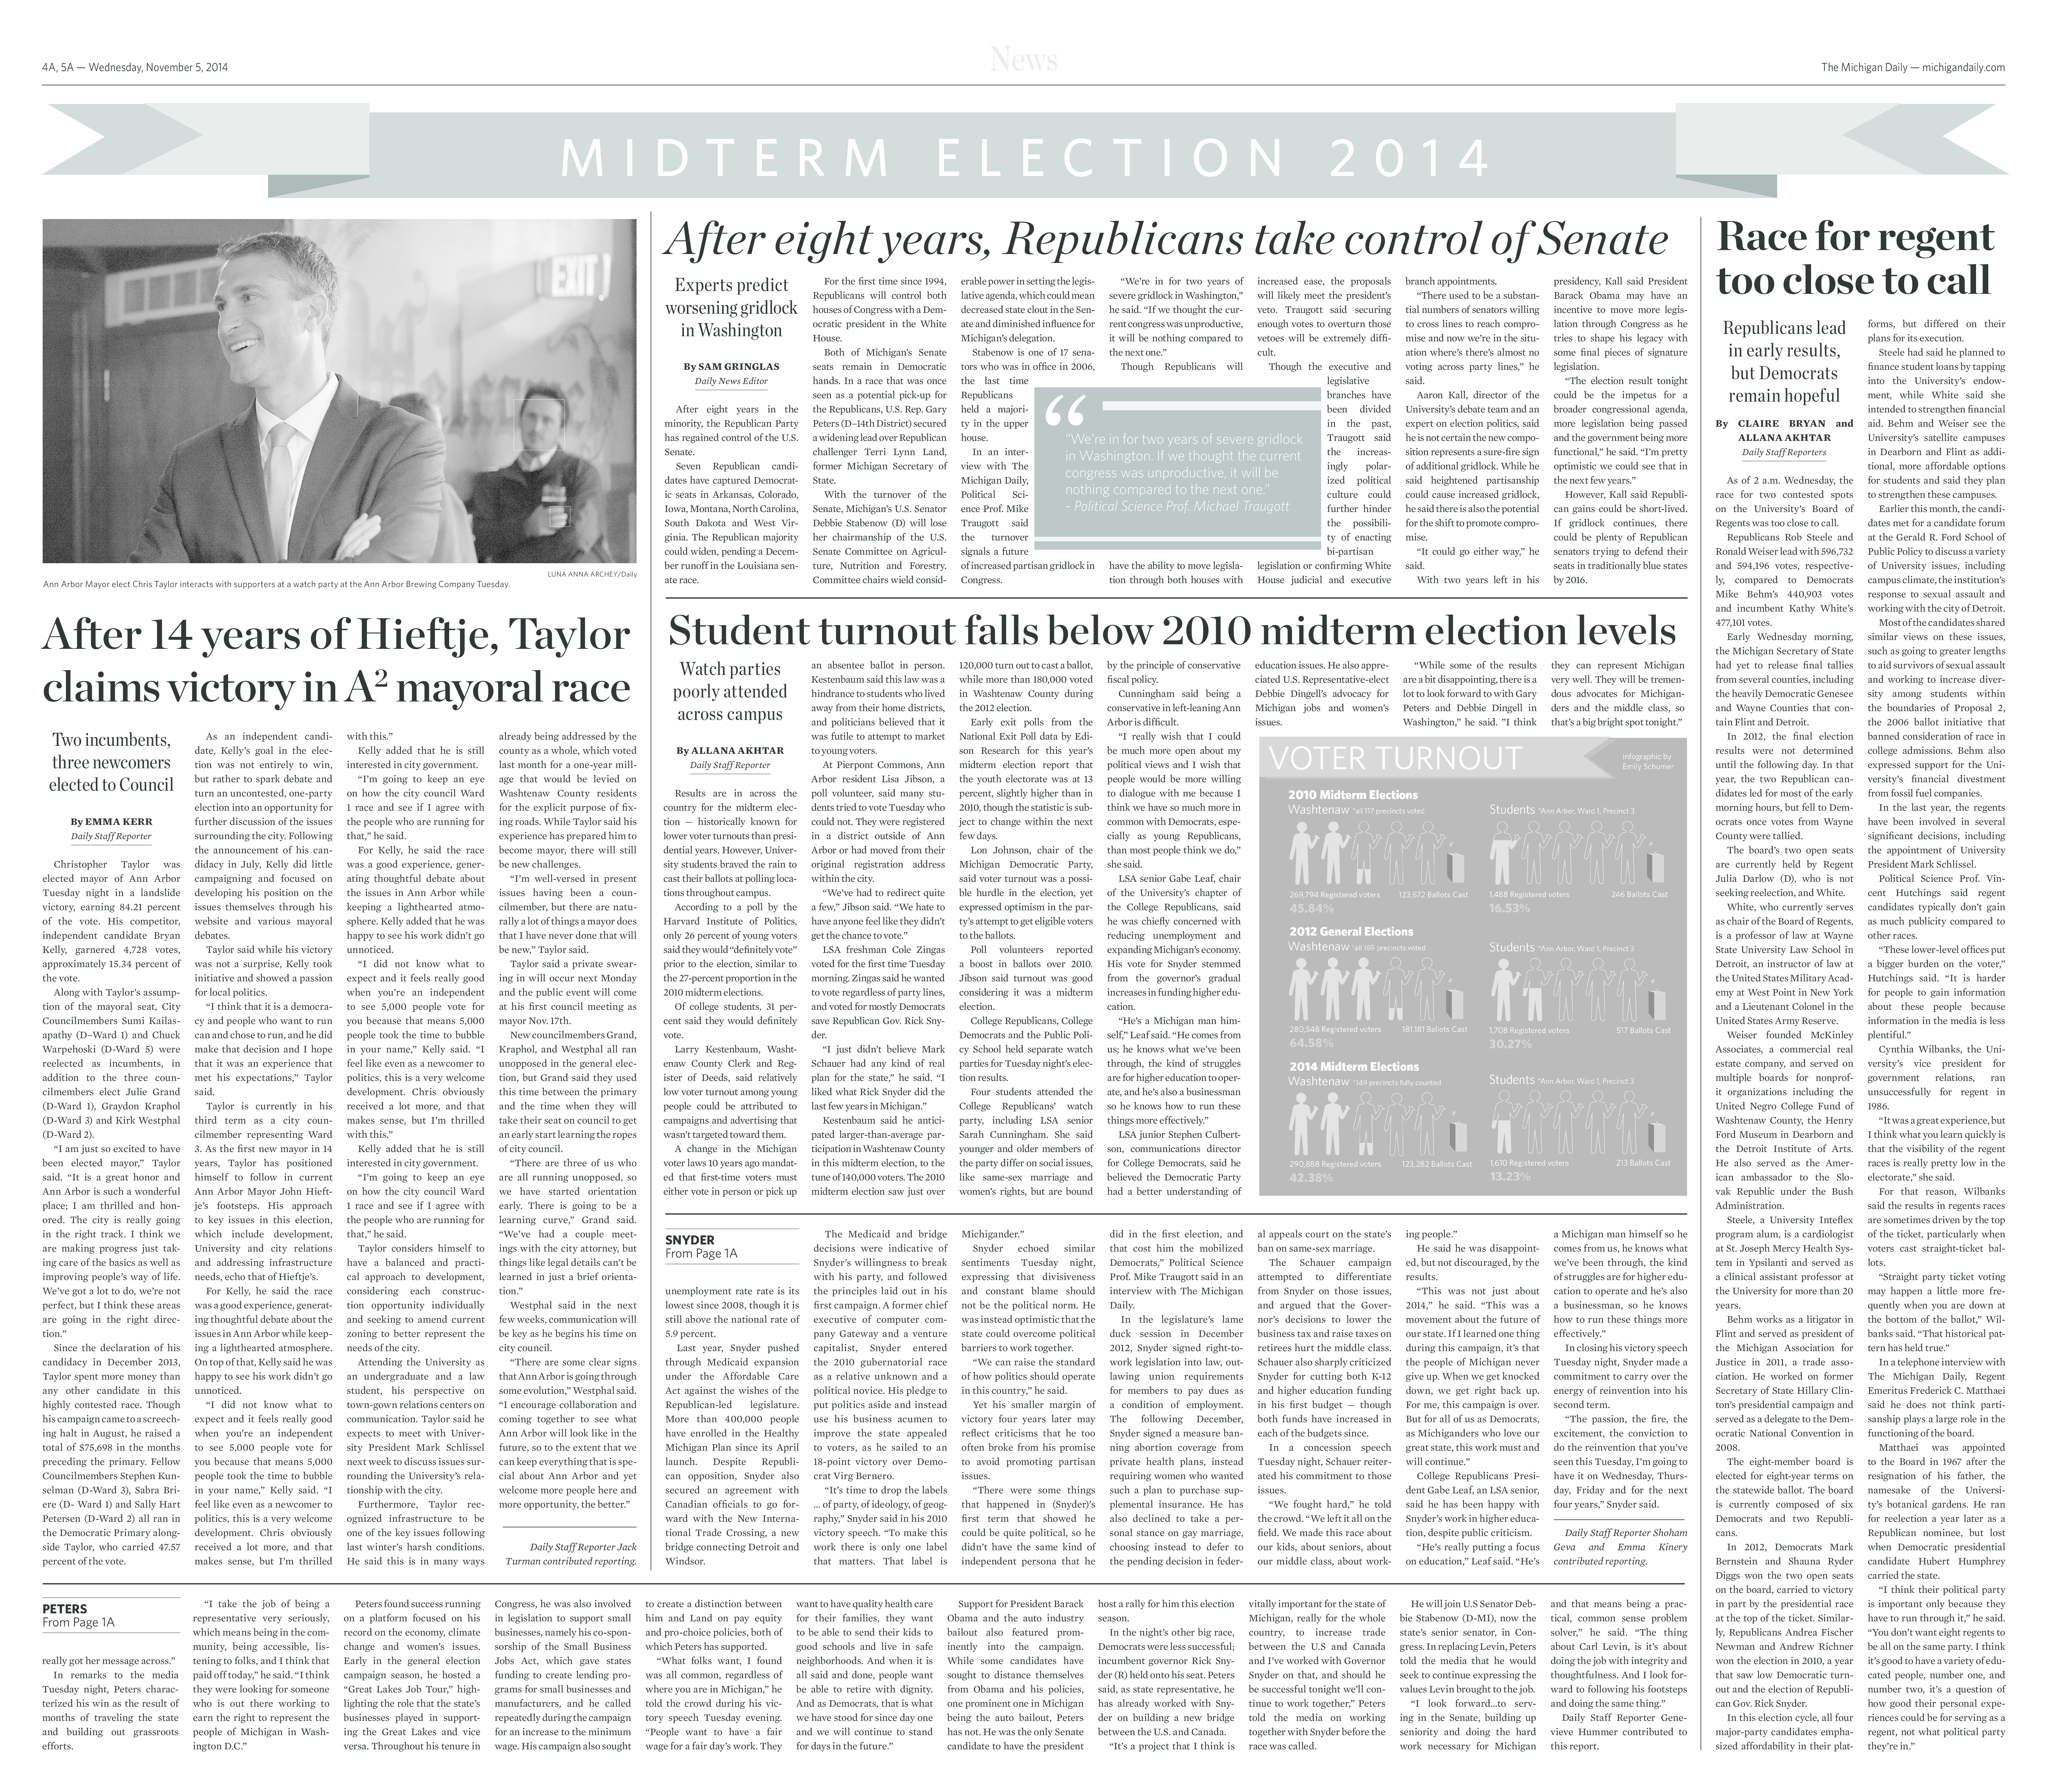

In [38]:
#search for string in every file
pngs = glob.glob("images/*.png")
for png in pngs:
    #text = pytesseract.image_to_string(png)
    ##if results are founded, search for faces in the .png file
    #if search in text:
        #print("Results found in file "+png)
        ##...search for faces into file
    cv_img = cv.imread(png)
    #gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #cv_img_bin=cv.threshold(img,0,120,cv.THRESH_BINARY)[1]
    #display(cv_img_bin)
    faces = face_cascade.detectMultiScale(cv_img,1.35)
    show_rects(faces)


In [26]:
faces

array([[1933, 1780,   71,   71],
       [1806, 1404,  178,  178]], dtype=int32)